## Procesamiento de Lenguaje Natural
## Practica 4: DOR
## Gustavo Hernández Angeles

In [22]:
import os
import re
import numpy as np
import math

In [13]:
def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []

    # Manera más chida de abrir (y cerrar auto) archivos.
    with open(path_corpus, "r", encoding="utf-8-sig") as f_corpus, open(path_truth, "r", encoding="utf-8-sig") as f_truth:
        for twitt in f_corpus:
            tr_txt += [twitt]
        for label in f_truth:
            tr_y += [label]

    return tr_txt, tr_y

In [14]:
tr_txt, tr_y = get_texts_from_file(".\\data\\mex_train.txt", ".\\data\\mex_train_labels.txt")

In [15]:
from nltk.tokenize import TweetTokenizer
import nltk
tokenizer = TweetTokenizer()

In [16]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)
fdist = nltk.FreqDist(corpus_palabras)

In [17]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [18]:
V = sortFreqDict(fdist)
V = V[:5000]

In [19]:
dict_indices = dict()
contador=0
for weight, word in V:
    dict_indices[word] = contador
    contador += 1

## BoW

In [24]:
# Definimos una BOW con esquema de peso binario.
def build_bow_tr(tr_txt, V, dict_indices):
    # Construimos en 0
    BOW = np.zeros(shape=(len(tr_txt), len(V)), dtype=int)
    
    
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        
        for word in fdist_doc:
            if word not in dict_indices:
                continue
            BOW[cont_doc, dict_indices[word]] += 1
            
        cont_doc += 1
    return BOW

In [25]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)

## Compute DOR

In [45]:
# de entrada tendrá la bolsa de palabras
def compute_dor(TR):
    # En esta ocasion no se filtran documentos
    TR_subset_in = TR
    
    DTR = np.zeros(shape=(TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=float)
    print("DOR: Shape of the input matrix (BoT):", TR.shape)
    print("DOR: Shape of the term-feat matrix:",DTR.shape)
    
    tam_V = TR_subset_in.shape[1] # Tamaño de vocabulario total
    
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        tam_v = np.count_nonzero(doc) # Tamaño de vocabulario documento
        for term in np.nonzero(doc)[0]:
            DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V / tam_v)
    
    return DTR

In [48]:
# Algo que conviene hacer es una normalización sobre todos los vectores de la matriz
from sklearn.preprocessing import normalize

DOR_base = compute_dor(BOW_tr)
DOR_base = normalize(DOR_base, norm="l2")

DOR: Shape of the input matrix (BoT): (5278, 5000)
DOR: Shape of the term-feat matrix: (5000, 5278)


In [49]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k = 1000)
feats.fit(BOW_tr, tr_y)

SelectKBest(k=1000, score_func=<function chi2 at 0x000001BBAD06F6D0>)

In [53]:
best = feats.get_support(indices=True)

In [54]:
best

array([   0,    1,    2,    3,    4,    5,    7,    9,   10,   11,   12,
         14,   17,   18,   19,   22,   24,   25,   28,   30,   35,   36,
         37,   38,   39,   41,   44,   47,   48,   49,   50,   51,   53,
         54,   56,   57,   58,   59,   60,   61,   63,   64,   65,   66,
         67,   69,   70,   71,   74,   75,   78,   79,   85,   86,   87,
         88,   89,   92,   93,   94,  100,  102,  103,  104,  105,  107,
        108,  109,  110,  111,  114,  115,  116,  117,  118,  119,  122,
        123,  124,  125,  128,  129,  131,  133,  134,  135,  136,  140,
        143,  147,  148,  150,  151,  153,  154,  155,  157,  160,  162,
        163,  164,  166,  167,  170,  177,  178,  179,  181,  182,  184,
        185,  186,  187,  188,  191,  192,  193,  200,  201,  207,  209,
        213,  216,  217,  219,  221,  222,  225,  230,  231,  233,  235,
        236,  237,  239,  240,  243,  245,  246,  248,  249,  250,  252,
        256,  257,  258,  259,  264,  265,  266,  2

In [55]:
dict_indice_invertido = {}
for w in dict_indices:
    dict_indice_invertido[dict_indices[w]] = w

In [57]:
target_words = [dict_indice_invertido[index] for index in best]

In [59]:
t_words = target_words

In [60]:
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
reduced_matrix = tsne.fit_transform(target_matrix)

In [66]:
max_x = np.amax(reduced_matrix, axis = 0)[0]
max_y = np.amax(reduced_matrix, axis = 0)[1]

In [69]:
from nltk.corpus import stopwords

sw=set(stopwords.words("spanish"))

c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\gusta\miniconda3\envs\tf\lib\site-packages\IPython\core\even

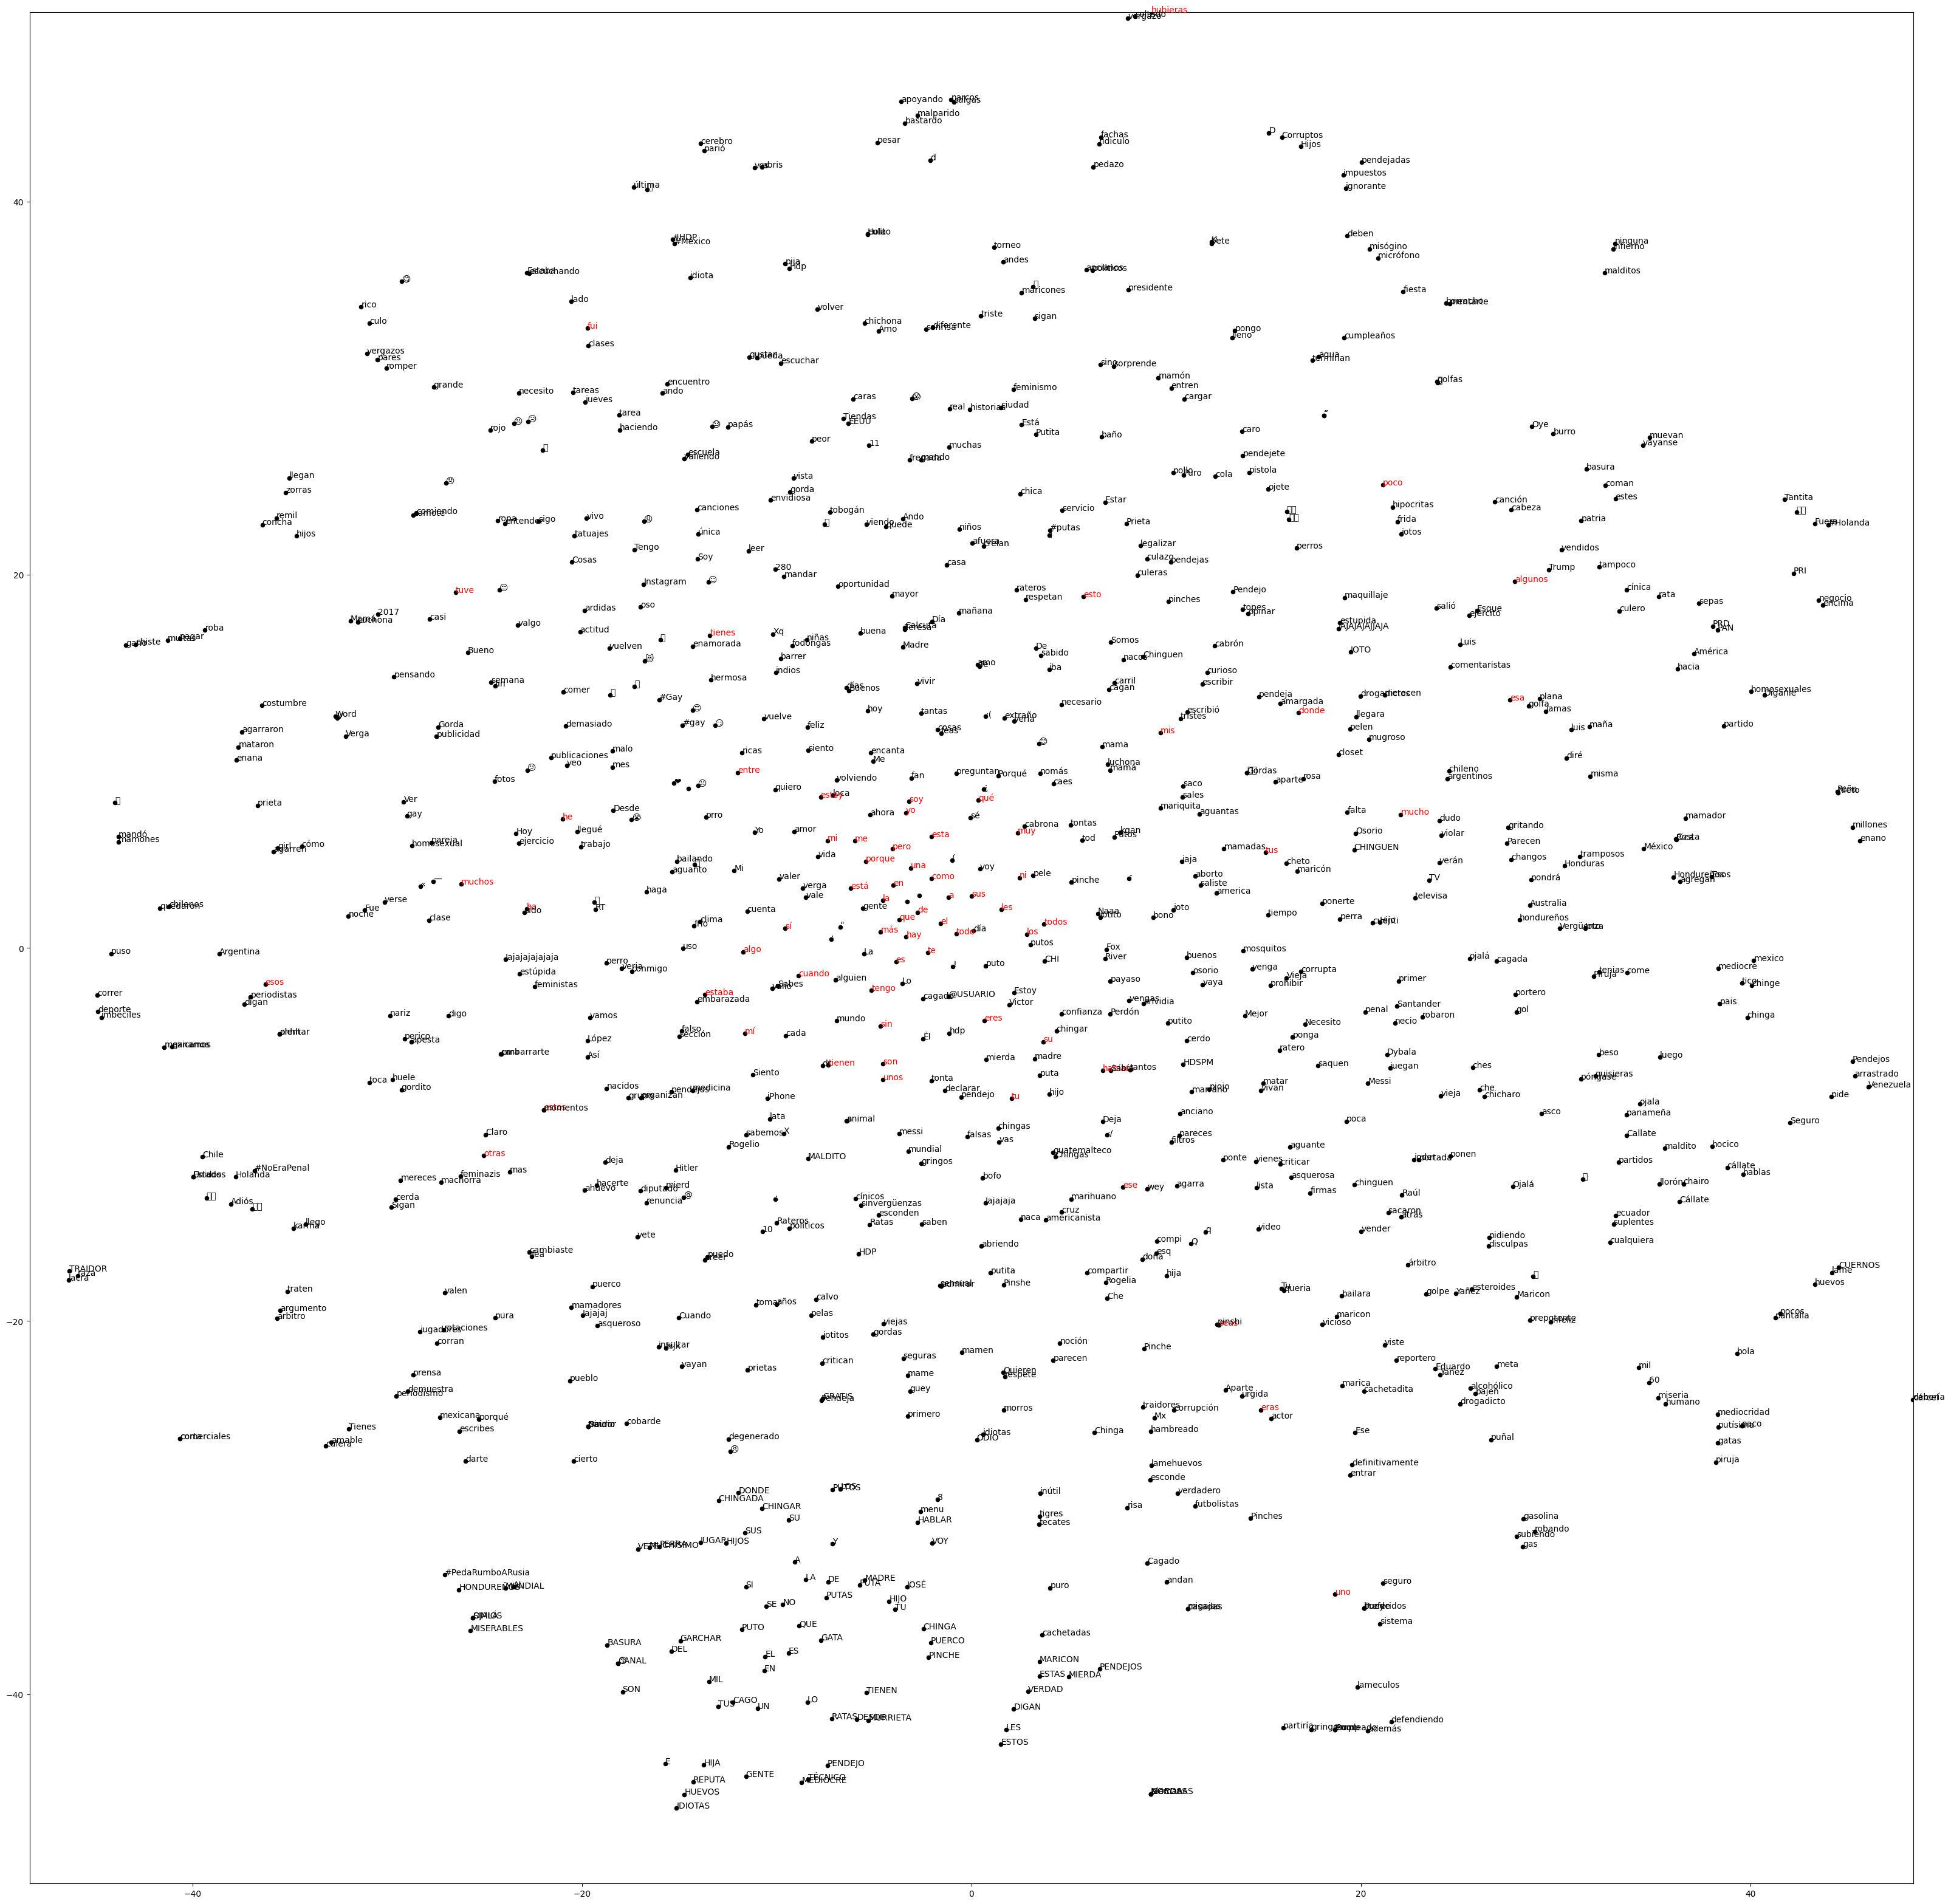

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40), dpi = 100)
plt.xlim((-max_x,max_x))
plt.ylim((-max_y, max_y))
plt.scatter(reduced_matrix[:,0], reduced_matrix[:,1], 20, color = "black")

for idx, word in enumerate(t_words):
    x = reduced_matrix[idx,0]
    y = reduced_matrix[idx,1]
    
    if word in sw:
        plt.annotate(word, (x,y), color = "red")
    else:
        plt.annotate(word, (x,y), color="black")

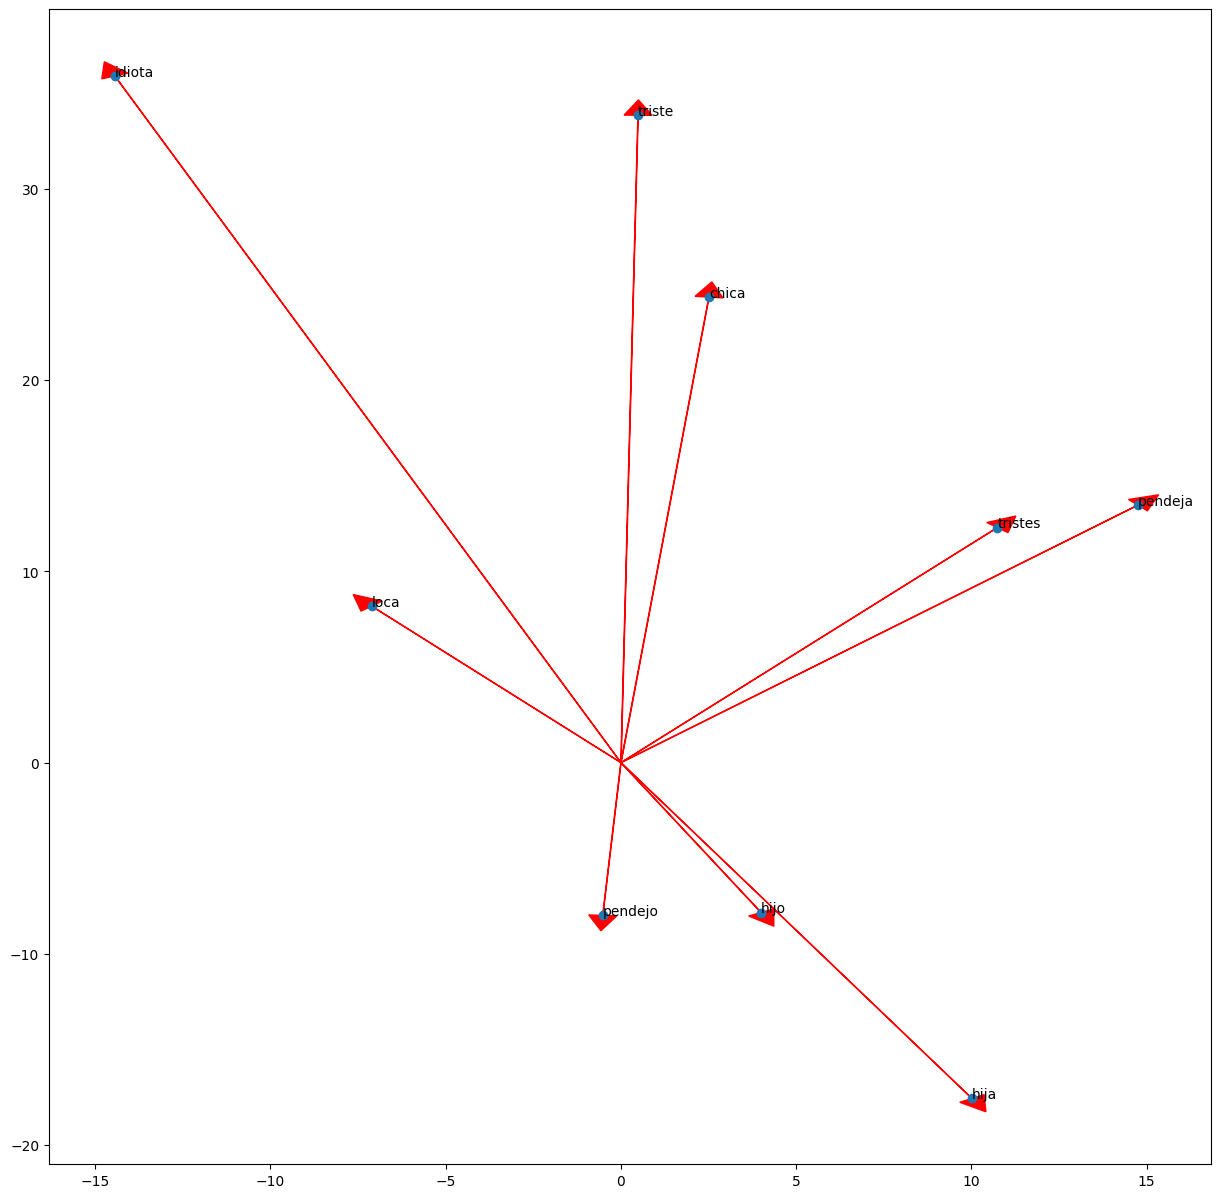

In [76]:
subset_words = ["tía", "tío", "idiota", "estúpido", "loca","tristes", "triste", "alegría", "pendejo", "pendeja", "chica", "hombres", "hija", "hijo"]

plotted_subsetwords = []
subreduced_matrix = []

for idx, word in enumerate(t_words):
    if word in subset_words:
        plotted_subsetwords += [word]
        subreduced_matrix += [reduced_matrix[idx]]

subreduced_matrix = np.array(subreduced_matrix)
fig, ax = plt.subplots(figsize=(15,15))

col1 = 0
col2 = 1

for word in subreduced_matrix:
    ax.arrow(0,0, word[col1], word[col2], head_width = 0.8, head_length=0.8, fc = "r", ec = "r", width = 1e-2)

ax.scatter(subreduced_matrix[:,0], subreduced_matrix[:,1])

for i in range(0, len(plotted_subsetwords)):
    ax.annotate(plotted_subsetwords[i], (subreduced_matrix[i,0], subreduced_matrix[i,1]))
    
plt.show()
